# Web page phishing detection using machine learning !


* Importing the necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

* Importing dataset CSV file

In [17]:
# a function that takes input csv file path and returns X and Y
#load dataframe

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df


In [22]:
df = load_data('data/dataset_phishing.csv')
df.head()



,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [6]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [7]:
df.shape

(11430, 89)

In [8]:
#drop duplicates
df = df.drop_duplicates()
df.shape
#no duplicates found

(11430, 89)

<Figure size 432x288 with 0 Axes>

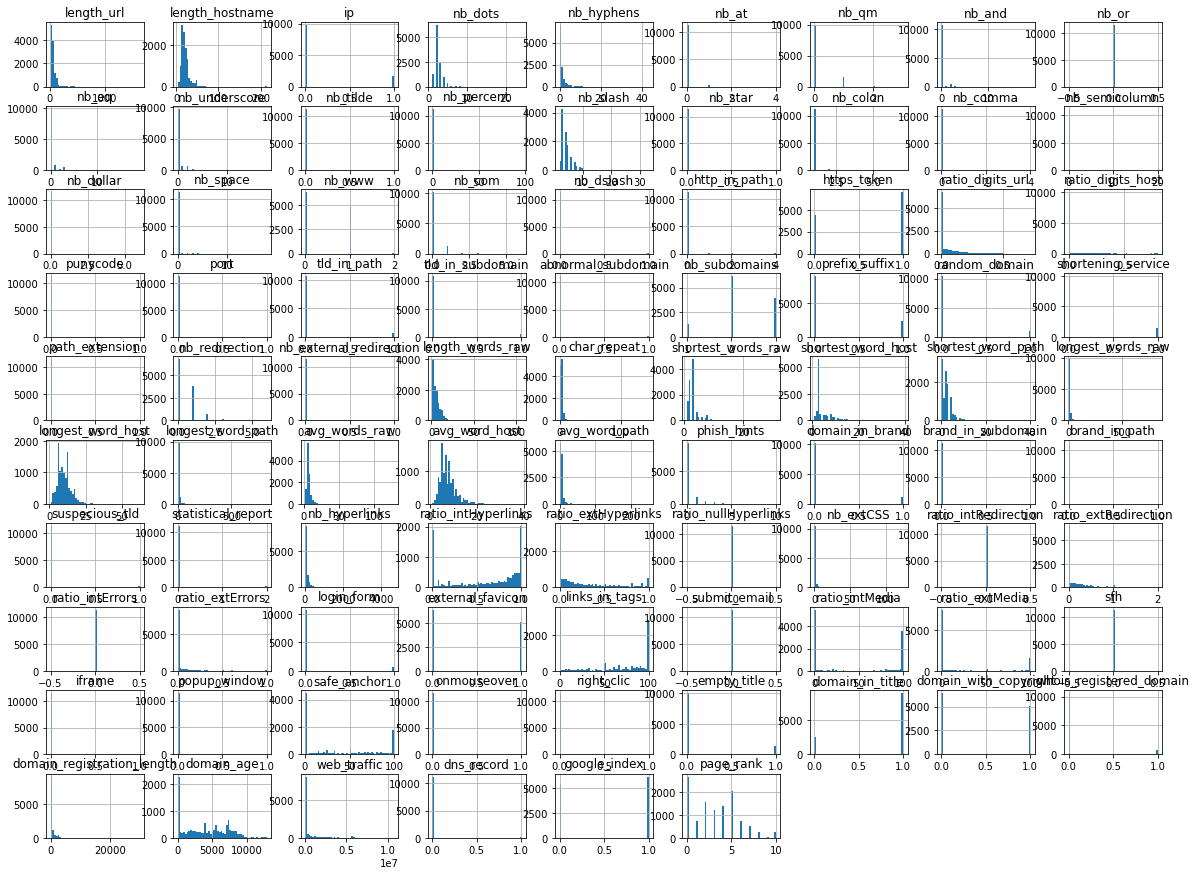

In [25]:
# #data visualization
# #add space between the subplots
# plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
# #space between axes and title
# plt.tight_layout()
# #plot histograms of the data
# df.hist(bins=50, figsize=(20,15))
# plt.show()


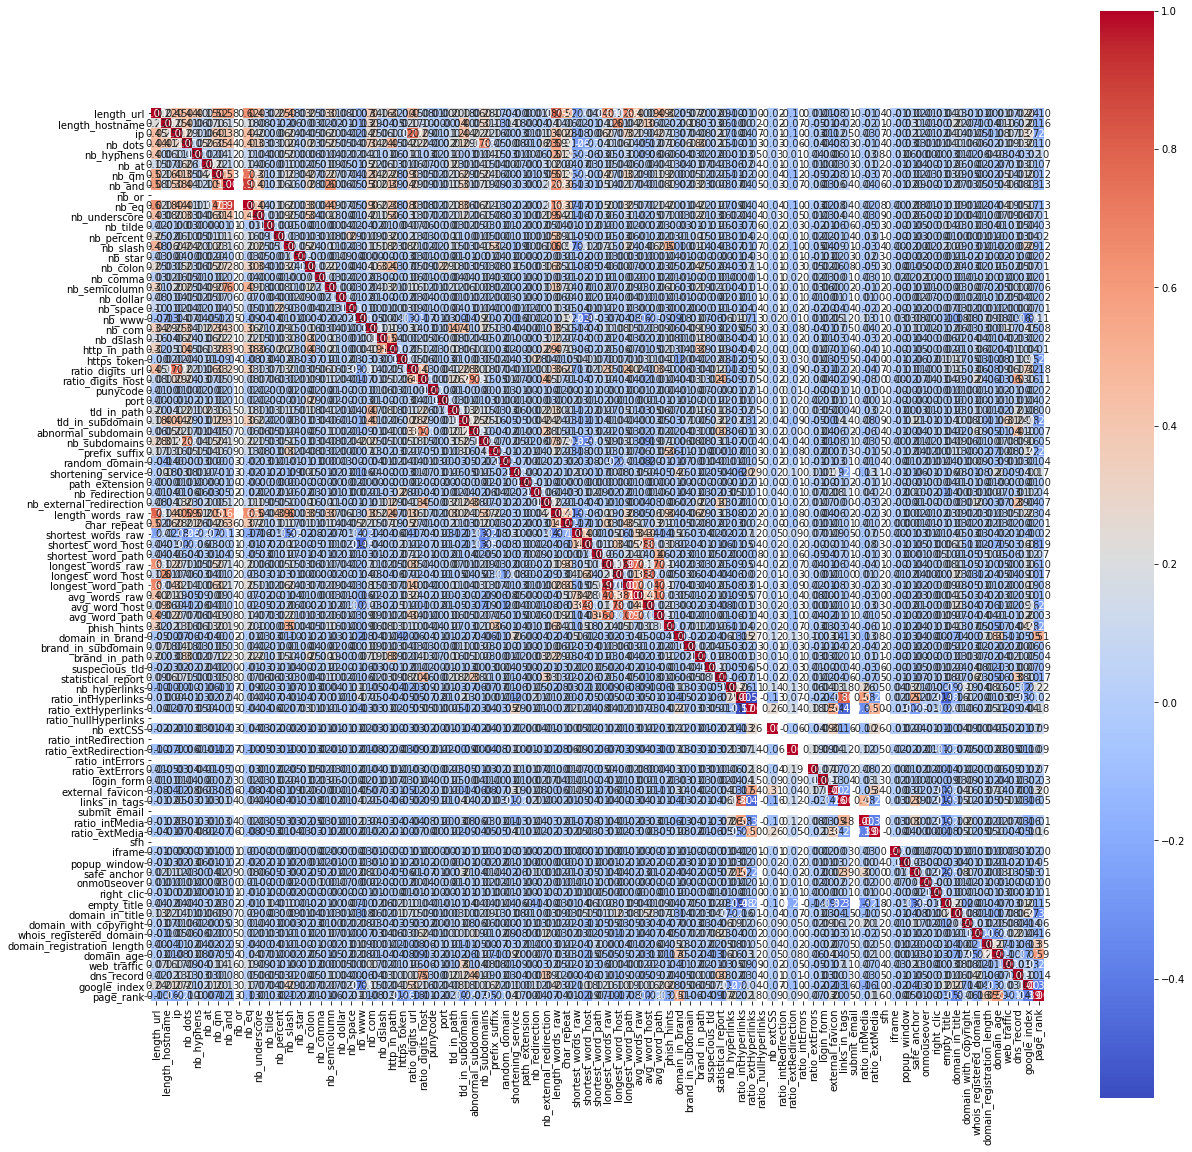

In [26]:
# #corr matrix
# corr_matrix = df.corr()
# #heatmap

# plt.figure(figsize=(20,20))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True , square=True, fmt='.2f')
# plt.show()

## Data Preprocessing

In [26]:
# data preprocessing
#1. We have to convert the categorical data into numerical data

# category = df.select_dtypes(include=['object']).columns
## the only categorical data is the class column and the url column
# we will convert the class column to numerical data
#by mapping the values : 1 for phishing and 0 for legitimate
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})
print(df['status'].value_counts())
df['status'].head()


0    5715
1    5715
Name: status, dtype: int64


0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int64

In [27]:
#the url column is not useful for the model so we will drop it
df = df.drop('url', axis=1)
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


### Splitting the dataset into training, validation and test set

In [28]:
#train test split
from sklearn.model_selection import train_test_split
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9144, 87), (2286, 87), (9144,), (2286,))

## Importing machine learning models


In [29]:

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


In [30]:
#logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', acc_log)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7878390201224846
[[908 249]
 [236 893]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1157
           1       0.78      0.79      0.79      1129

    accuracy                           0.79      2286
   macro avg       0.79      0.79      0.79      2286
weighted avg       0.79      0.79      0.79      2286



In [31]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred)
print('SVM Accuracy:', acc_svc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.5958005249343832
[[364 793]
 [131 998]]
              precision    recall  f1-score   support

           0       0.74      0.31      0.44      1157
           1       0.56      0.88      0.68      1129

    accuracy                           0.60      2286
   macro avg       0.65      0.60      0.56      2286
weighted avg       0.65      0.60      0.56      2286



In [32]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred)
print('KNN Accuracy:', acc_knn)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


KNN Accuracy: 0.836832895888014
[[947 210]
 [163 966]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1157
           1       0.82      0.86      0.84      1129

    accuracy                           0.84      2286
   macro avg       0.84      0.84      0.84      2286
weighted avg       0.84      0.84      0.84      2286



c:\Users\lap2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [33]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = accuracy_score(y_test, y_pred)
print('Gaussian Naive Bayes Accuracy:', acc_gaussian)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gaussian Naive Bayes Accuracy: 0.7401574803149606
[[703 454]
 [140 989]]
              precision    recall  f1-score   support

           0       0.83      0.61      0.70      1157
           1       0.69      0.88      0.77      1129

    accuracy                           0.74      2286
   macro avg       0.76      0.74      0.74      2286
weighted avg       0.76      0.74      0.74      2286



In [34]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = accuracy_score(y_test, y_pred)
print('Perceptron Accuracy:', acc_perceptron)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Perceptron Accuracy: 0.3674540682414698
[[268 889]
 [557 572]]
              precision    recall  f1-score   support

           0       0.32      0.23      0.27      1157
           1       0.39      0.51      0.44      1129

    accuracy                           0.37      2286
   macro avg       0.36      0.37      0.36      2286
weighted avg       0.36      0.37      0.36      2286



In [35]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = accuracy_score(y_test, y_pred)
print('Linear SVC Accuracy:', acc_linear_svc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Linear SVC Accuracy: 0.7322834645669292
[[684 473]
 [139 990]]
              precision    recall  f1-score   support

           0       0.83      0.59      0.69      1157
           1       0.68      0.88      0.76      1129

    accuracy                           0.73      2286
   macro avg       0.75      0.73      0.73      2286
weighted avg       0.75      0.73      0.73      2286



c:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [36]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = accuracy_score(y_test, y_pred)
print('SGD Accuracy:', acc_sgd)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


SGD Accuracy: 0.4138232720909886
[[297 860]
 [480 649]]
              precision    recall  f1-score   support

           0       0.38      0.26      0.31      1157
           1       0.43      0.57      0.49      1129

    accuracy                           0.41      2286
   macro avg       0.41      0.42      0.40      2286
weighted avg       0.41      0.41      0.40      2286



In [37]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy:', acc_decision_tree)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.9308836395450568
[[1075   82]
 [  76 1053]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1157
           1       0.93      0.93      0.93      1129

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



In [38]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy:', acc_random_forest)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9671916010498688
[[1125   32]
 [  43 1086]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1157
           1       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [40]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

#cross validation
models = [logreg, svc, knn, gaussian, perceptron, linear_svc, sgd, decision_tree, random_forest]
model_names = ['Logistic Regression', 'SVC', 'KNN', 'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 'SGD', 'Decision Tree', 'Random Forest']
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f'{name} cross validation score: {scores.mean()}')


Logistic Regression cross validation score: 0.7781058459183796
SVC cross validation score: 0.5992993028900766
KNN cross validation score: 0.8362873814733771
Gaussian Naive Bayes cross validation score: 0.744536236562997
Perceptron cross validation score: 0.4849094235391183
Linear SVC cross validation score: 0.7053764752304768
SGD cross validation score: 0.48205366431108077
Decision Tree cross validation score: 0.9315406966316319
Random Forest cross validation score: 0.9648949552199543


In [41]:
#model evaluation
models = [logreg, svc, knn, gaussian, perceptron, linear_svc, sgd, decision_tree, random_forest]

model_names = ['Logistic Regression', 'SVC', 'KNN', 'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 'SGD', 'Decision Tree', 'Random Forest']
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(f'{name} accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'{name} confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'{name} classification report: \n{classification_report(y_test, y_pred)}')
    print('\n\n')


Logistic Regression accuracy: 0.7878390201224846
Logistic Regression confusion matrix: 
[[908 249]
 [236 893]]
Logistic Regression classification report: 
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1157
           1       0.78      0.79      0.79      1129

    accuracy                           0.79      2286
   macro avg       0.79      0.79      0.79      2286
weighted avg       0.79      0.79      0.79      2286




SVC accuracy: 0.5958005249343832
SVC confusion matrix: 
[[364 793]
 [131 998]]
SVC classification report: 
              precision    recall  f1-score   support

           0       0.74      0.31      0.44      1157
           1       0.56      0.88      0.68      1129

    accuracy                           0.60      2286
   macro avg       0.65      0.60      0.56      2286
weighted avg       0.65      0.60      0.56      2286




KNN accuracy: 0.836832895888014
KNN confusion matrix: 
[[947 210]
 [163 966]]


In [87]:
#rank models
rank = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVC', 'KNN', 'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 'SGD', 'Decision Tree', 'Random Forest'],
    'Score': [acc_log, acc_svc, acc_knn, acc_gaussian, acc_perceptron, acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest]
})
rank = rank.sort_values(by='Score', ascending=False)
rank


,Model,Score
8,Random Forest,0.967192
7,Decision Tree,0.930884
2,KNN,0.836833
0,Logistic Regression,0.787839
3,Gaussian Naive Bayes,0.740157
5,Linear SVC,0.732283
1,SVC,0.595801
6,SGD,0.413823
4,Perceptron,0.367454


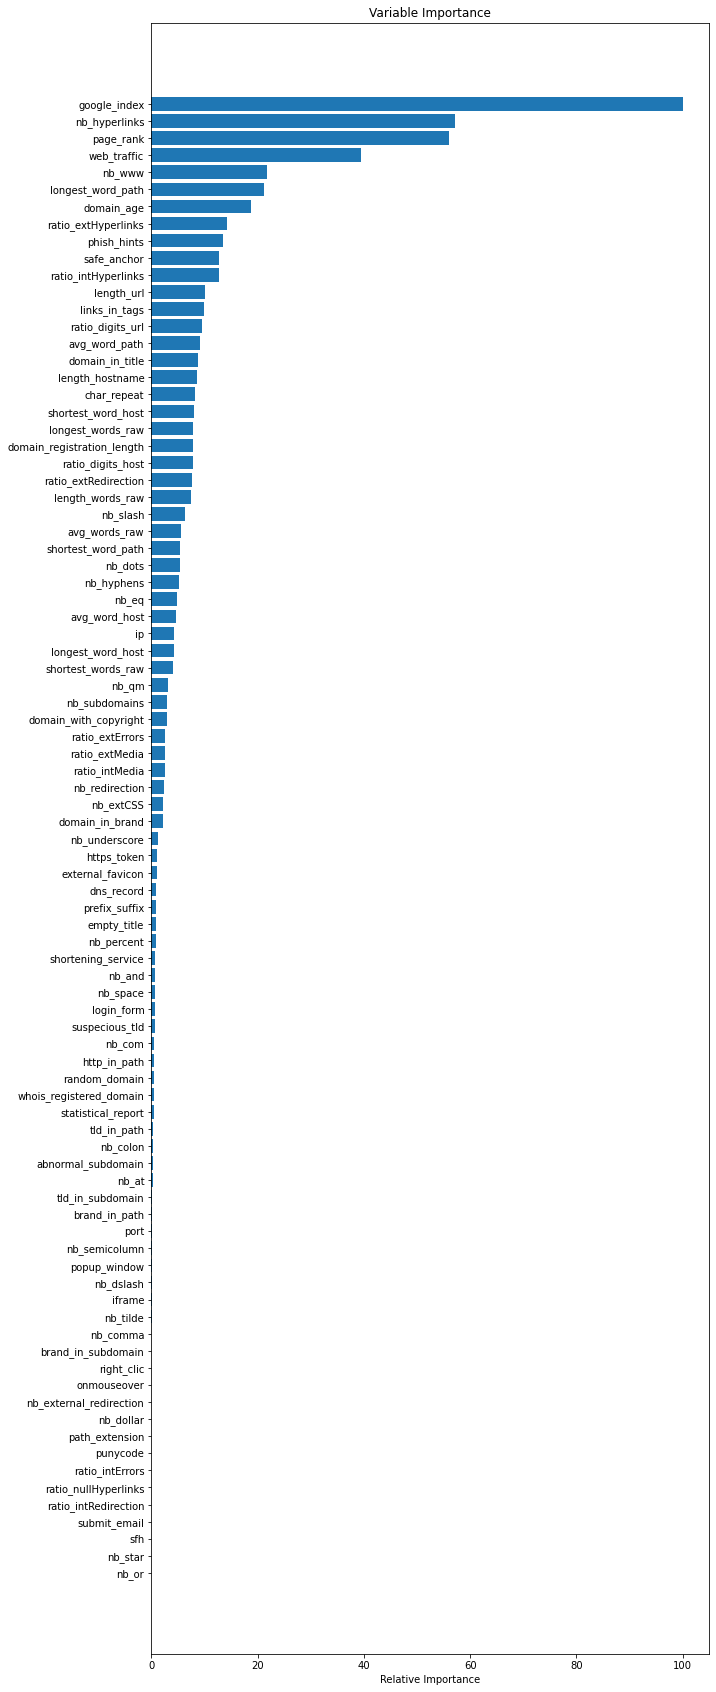

               feature  Relative importance
0          safe_anchor            12.793010
1          phish_hints            13.436807
2  ratio_extHyperlinks            14.238282
3           domain_age            18.804980
4    longest_word_path            21.177044
5               nb_www            21.686232
6          web_traffic            39.465547
7            page_rank            56.071965
8        nb_hyperlinks            57.057590
9         google_index           100.000000


In [54]:
#random forest is the best model
#feature importance
feature_importance = random_forest.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
#87 features, large figure
plt.figure(figsize=(10,30))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#print the most important features
important_features = X.columns[sorted_idx][-10:]
#dataframe of the most important features with their importance percentage
important_features_df = pd.DataFrame({'feature': important_features, 'Relative importance': feature_importance[sorted_idx][-10:]})
print(important_features_df)


In [55]:
#since the random forest model has the highest accuracy we will use it to make predictions
#and save the model
import joblib
joblib.dump(random_forest, 'phishing_model.pkl')
#load the model
model = joblib.load('phishing_model.pkl')
#make predictions
predictions = model.predict(X_test)
print(predictions)


[0 0 0 ... 1 0 1]


[1 1 1 1 1 1 1 1 1 1]


# Ensemble Learning

In [82]:
#using Ensemble Learning
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('logreg', logreg), ('svc', svc), ('knn', knn), ('gaussian', gaussian), ('perceptron', perceptron), ('linear_svc', linear_svc), ('sgd', sgd), ('decision_tree', decision_tree), ('random_forest', random_forest)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)



0.9186351706036745

##### So random forest is better than ensemble learning

In [85]:
#using bagging
from sklearn.ensemble import BaggingClassifier
#instantiate a BaggingClassifier
bagging = BaggingClassifier(RandomForestClassifier(), max_samples=0.5, max_features=0.5)
#fit to the training data
bagging.fit(X_train, y_train)
#test our model on the test data
bagging.score(X_test, y_test)


0.962817147856518

In [86]:
#using boosting
from sklearn.ensemble import AdaBoostClassifier
#instantiate a AdaBoostClassifier
adaboost = AdaBoostClassifier(RandomForestClassifier(), n_estimators=5)
#fit to the training data
adaboost.fit(X_train, y_train)
#test our model on the test data
adaboost.score(X_test, y_test)


0.968066491688539